In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

In [2]:

np.random.seed(0)

def generate_linearly_separable_data(num_samples=100, seed=None):
    """
    Generate linearly separable data with two features (x1 and x2) for two classes (0 and 1).

    Parameters:
    - num_samples: Number of samples for each class.
    - seed: Seed for random number generation for reproducibility.

    Returns:
    - X: NumPy array containing features (x1 and x2).
    - y: NumPy array containing class labels (0 or 1).
    """
    if seed is not None:
        np.random.seed(seed)
    # Generate random coefficients for the linear equation separating the classes
    coef_x1, coef_x2 = np.random.randn(2)
    # Generate random points for class 0
    X0 = np.random.rand(num_samples, 2)
    y0 = np.zeros(num_samples)
    # Generate random points for class 1, ensuring linear separability
    X1 = np.random.rand(num_samples, 2)
    X1[:, 1] = coef_x1 * X1[:, 0] + coef_x2 + np.random.randn(num_samples) * 0.1
    y1 = np.ones(num_samples)
    # Combine the points for both classes
    X = np.vstack([X0, X1])
    y = np.concatenate([y0, y1])
    return X, y



def generate_random_dataset(size):
    X = []
    rand = random.randint(1,199)
    for _ in range(size):
        if( rand % 3 == 0 ) : 
            X.append([np.round(random.uniform(2, 4), 1) ,np.round(random.uniform(0, 15), 1)] )
        elif(rand%3==1 ) : 
            X.append([np.round(random.uniform(1, 5), 2),np.round(random.uniform(20, 25), 2)])
        else :
            X.append([np.round(random.uniform(3, 8), 2),np.round(random.uniform(5 ,25), 2)])
    return X

def makePoints1(dataset): 
    Y = []
    data = sorted(dataset , key=lambda x: x[0])
    max = data[len(data)-1][0] 
    min = data[0][0]
    s1 =  (max+min)/2 
    for ix in dataset : 
        if ix[0] <= s1: 
            Y.append(0)
        else : 
            Y.append(1)
    return Y


def makePoints2(dataset): 
    Y = []
    for ix in dataset : 
        if ( ix[0] <=  5.5 and ix[1] <= 18 ) :
           Y.append(0)
        else :
            Y.append(1)
    return Y


def makePoints3(dataset): 
    Y = []
    for ix in dataset : 
        if ix[1] <= -3.25*ix[0] + 30 : 
            Y.append(0)
        else : 
            Y.append(1)
    return Y


def is_in_circle(ix , xceneter , ycenter , radious ) : 
    rtmp = ( ix[0] - xceneter )**2 + ( ix[1]-ycenter)**2 
    if( rtmp <= radious**2 ) :
        return True
    return False 

def make_points_circular( radious , xceneter , ycenter , X) : 
    Y = []
    for ix in X : 
        if( is_in_circle(ix , xceneter , ycenter , radious )) : 
           Y.append(0)
        else :
            Y.append(1)
    return Y     
    

def make_points_2Circles( X  ,radious , xceneter , ycenter ) : 
    Y = []
    for ix in X : 
        if( is_in_circle(ix , xceneter , ycenter , radious ) or is_in_circle(ix , xceneter+3 , ycenter+4 , radious-0.5 ) ) : 
           Y.append(0)
        else :
            Y.append(1)
    return Y     

def ClassifiyedPoints(X , Y ) : 
    x0 = []
    x1 = []
    for i in range(len(X)) : 
        if(Y[i] == 1 ) : 
            x1.append(X[i])
        else : 
            x0.append(X[i])
    return x0,x1

def Plot_2_classes(x_vals0 , x_vals1,title) : 
    plt.scatter(x_vals0[0],x_vals0[1], label='Class 0 (Filtered)', color='blue')
    plt.scatter(x_vals1[0],x_vals1[1], label='Class 1 (Filtered)', color='red')
    plt.title('Scatter Plot of Points with Class  (Filtered) ' + title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()  # Show legend with class labels
    plt.show()
    

def Classification_model( X_train , X_test , Y_train , Y_test ,clf,s1,s2 ) : 
    # clf = svm.SVC(kernel='linear')
    clf.fit(X_train , Y_train )
    predictions = clf.predict( X_test )
    plt.figure(figsize=(6 , 6)) 
    # Constructing a hyperplane using a formula.
    w = clf.coef_[0]           # w consists of 2 elements
    b = clf.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(s1,s2)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    
    # Plotting our two-features-space
    sns.scatterplot(x=X_train[:, 0], 
                    y=X_train[:, 1], 
                    hue=Y_train, 
                    s=8)
    # Plotting a red hyperplane
    plt.plot(x_points, y_points, c='r')
    # Encircle support vectors
    plt.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=.5)
    # Step 2 (unit-vector):
    w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--', 
            linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'g--',
            linewidth=2)




   


In [3]:
def plot_decision_boundary(ax , pred_func , X , y ):
    # x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    # y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # h = 0.01
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)
    # plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    



effect of different kernels :

linear kernel accuracy :  1.0
rbf kernel accuracy :  0.96
sigmoid kernel accuracy :  0.47
poly kernel accuracy :  1.0


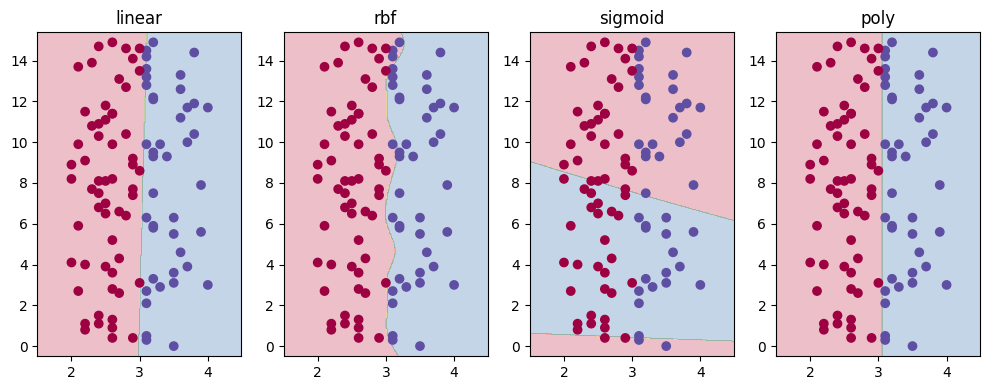

In [8]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 

size = 500
while( o == -1 ) :
    dataset = generate_random_dataset(size)
    label = makePoints1(dataset)
    dataset = np.array( dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)
    x0_vals , x1_vals = ClassifiyedPoints( X_train ,Y_train  )
    
    if( x0_vals == 0 or x1_vals ==0 ) :
        o = -1
    else :
        o = 0 
        
clf1 = svm.SVC(kernel='linear' , gamma="auto")    
clf1.fit( X_train , Y_train)
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )


clf2 = svm.SVC(kernel='rbf' , gamma="auto")    
clf2.fit( X_train , Y_train)
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )


clf3 = svm.SVC(kernel='sigmoid' , gamma="scale")    
clf3.fit( X_train , Y_train)
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )

clf4 = svm.SVC(kernel= 'poly', gamma="auto")    
clf4.fit( X_train , Y_train)
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )


fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed

plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()


linear kernel accuracy :  0.96
rbf kernel accuracy :  1.0
sigmoid kernel accuracy :  0.7
poly kernel accuracy :  1.0


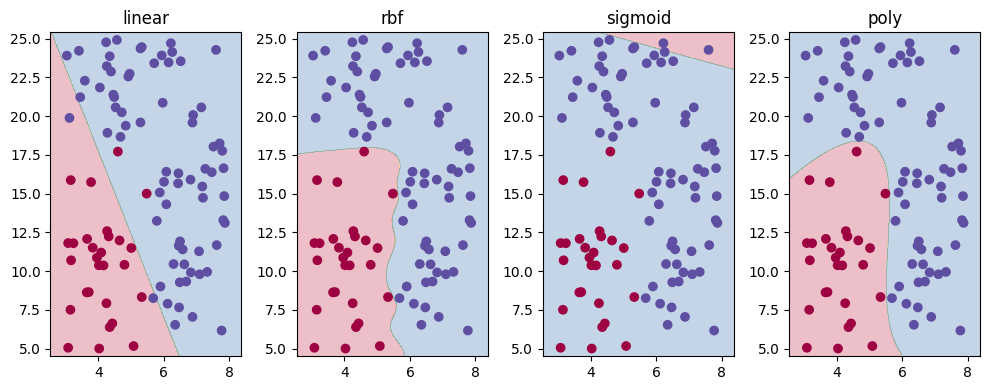

In [35]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 

size = 500
while( o == -1 ) :
    dataset = generate_random_dataset(size)
    label = makePoints2(dataset)
    dataset = np.array( dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)
    x0_vals , x1_vals = ClassifiyedPoints( X_train ,Y_train  )
    
    if(len( x0_vals) == 0 or len(x1_vals) ==0 ) :
        o = -1
    else :
        o = 0 
        
clf1 = svm.SVC(kernel='linear' , gamma="auto")    
clf1.fit( X_train , Y_train)
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )


clf2 = svm.SVC(kernel='rbf' , gamma="auto")    
clf2.fit( X_train , Y_train)
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )


clf3 = svm.SVC(kernel='sigmoid' , gamma="scale")    
clf3.fit( X_train , Y_train)
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )

clf4 = svm.SVC(kernel= 'poly', gamma="auto")    
clf4.fit( X_train , Y_train)
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )


fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed


plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()


linear kernel accuracy :  0.79
rbf kernel accuracy :  0.96
sigmoid kernel accuracy :  0.79
poly kernel accuracy :  0.86


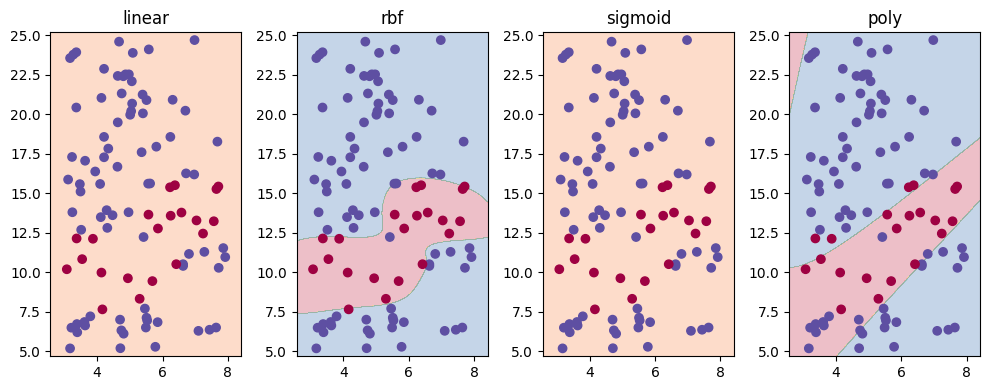

In [36]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 

size = 500
while( o == -1 ) :
    dataset = generate_random_dataset(size)
    # label = makePoints1(dataset)
    label = make_points_2Circles(dataset , 2.5 , 4 , 10 )
    dataset = np.array( dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)
    x0_vals , x1_vals = ClassifiyedPoints( X_train ,Y_train  )
    if(len( x0_vals) == 0 or len(x1_vals) ==0 ) :
        o = -1
    else :
        o = 0 

        
clf1 = svm.SVC(kernel='linear' , gamma="auto")    
clf1.fit( X_train , Y_train)
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )


clf2 = svm.SVC(kernel='rbf' , gamma="auto")    
clf2.fit( X_train , Y_train)
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )


clf3 = svm.SVC(kernel='sigmoid' , gamma="scale")    
clf3.fit( X_train , Y_train)
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )

clf4 = svm.SVC(kernel= 'poly', gamma="auto")    
clf4.fit( X_train , Y_train)
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )


fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed


plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()


linear kernel accuracy :  0.81
rbf kernel accuracy :  0.96
sigmoid kernel accuracy :  0.85
poly kernel accuracy :  0.88


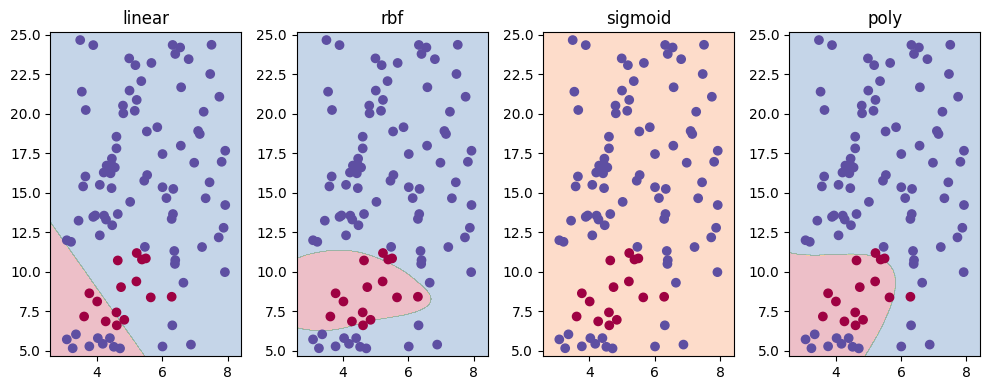

In [37]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 


size = 500
while( o == -1 ) :
    dataset = generate_random_dataset(size)
    label = make_points_circular(2.5 , 4 , 9 , dataset)
    dataset = np.array( dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)
    x0_vals , x1_vals = ClassifiyedPoints( X_train ,Y_train  )
    if(len( x0_vals) == 0 or len(x1_vals) ==0 ) :
        o = -1
    else :
        o = 0 


clf1 = svm.SVC(kernel='linear' , gamma="auto")    
clf1.fit( X_train , Y_train)
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )


clf2 = svm.SVC(kernel='rbf' , gamma="auto")    
clf2.fit( X_train , Y_train)
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )


clf3 = svm.SVC(kernel='sigmoid' , gamma="scale")    
clf3.fit( X_train , Y_train)
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )

clf4 = svm.SVC(kernel= 'poly', gamma="auto")    
clf4.fit( X_train , Y_train)
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )


fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed


plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()


linear kernel accuracy :  0.6666666666666666
rbf kernel accuracy :  0.9833333333333333
sigmoid kernel accuracy :  0.6
poly kernel accuracy :  0.55


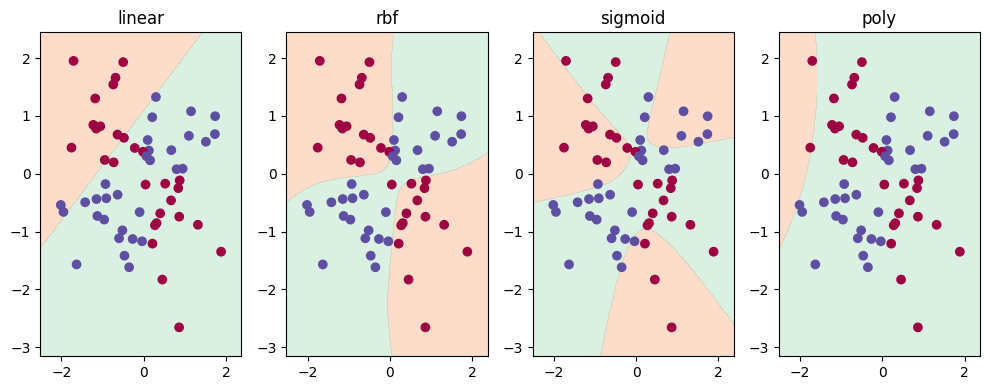

In [38]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 


dataset = np.random.randn(300, 2)
label = np.logical_xor(dataset[:, 0] < 0, dataset[:, 1] > 0)
X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)


clf1 = svm.SVC(kernel='linear' , gamma="auto")    
clf1.fit( X_train , Y_train)
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )


clf2 = svm.SVC(kernel='rbf' , gamma="auto")    
clf2.fit( X_train , Y_train)
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )


clf3 = svm.SVC(kernel='sigmoid' , gamma="scale")    
clf3.fit( X_train , Y_train)
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )

clf4 = svm.SVC(kernel= 'poly', gamma="auto")    
clf4.fit( X_train , Y_train)
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )


fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed


plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()


effect of Regularization Parameter (C) : 
C parameter can be used to provides the balance between these goals.

If we choose large value for C, we get small margin but lower misclassification
If we choose small value for C, we get large margin but high misclassification compared to large C value.

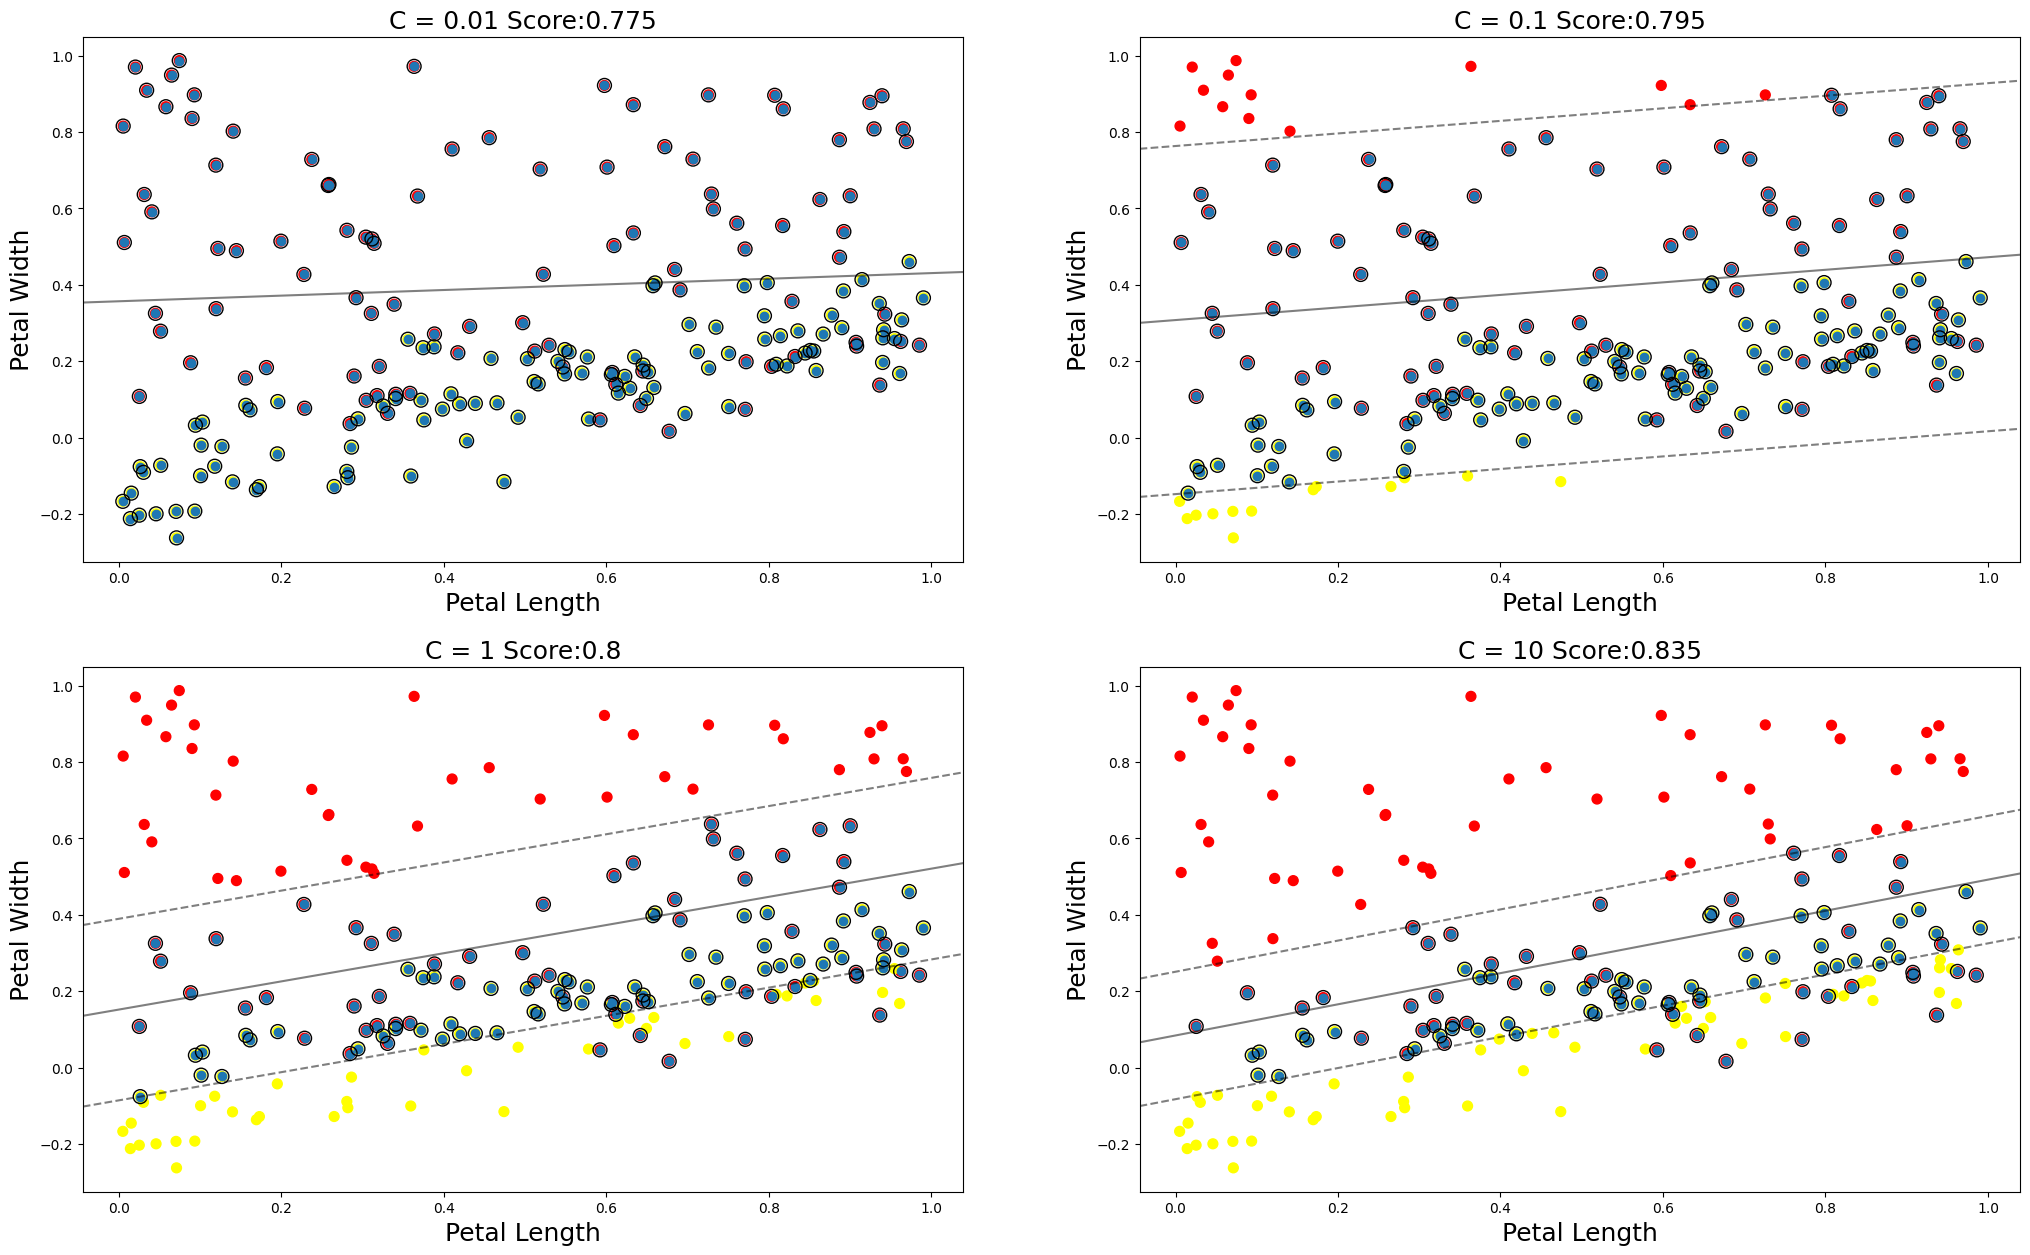

In [49]:

def visualize_svm_C(C,title,X_petal , y  ):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_petal, y)
    ax = plt.gca()
    plt.scatter(X_petal[:,0], X_petal[:,1], c=y, s=50, cmap='autumn')
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel("Petal Length",fontsize = 18)
    plt.ylabel("Petal Width",fontsize = 18)
    plt.title(title + " Score:" + str(model.score(X_petal,y)),fontsize = 18)


X, y = generate_linearly_separable_data(num_samples=100, seed=42)

plt.figure(figsize=(25,15))
for i,c in enumerate([0.01,0.1,1,10]):  
    plt.subplot(2,2,i+1)
    visualize_svm_C(C = c, title = "C = " + str(c) , X_petal=X , y=y )
plt.show()


effect of degree parameter on poly kernel : 
Degree of the polynomial kernel. It is just used by poynomial kernel and ignored by other kernels. High polynomial degree yield more flexible decision boundary. Let's visualize that.

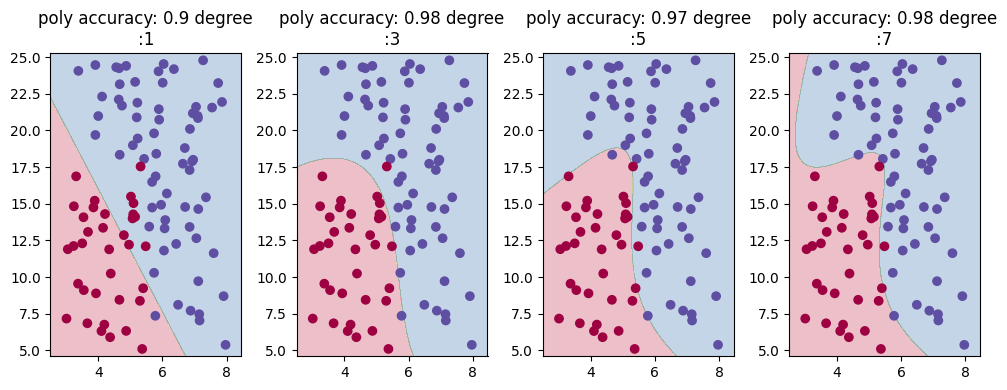

In [58]:
X_train =[] 
X_test =[] 
Y_train =[]
Y_test  =[]
x0_vals  = []
x1_vals = []
o  =-1 

size = 500
while( o == -1 ) :
    dataset = generate_random_dataset(size)
    label = makePoints2(dataset)
    dataset = np.array( dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset,label, test_size=0.2, random_state=42)
    x0_vals , x1_vals = ClassifiyedPoints( X_train ,Y_train  )
    
    if(len( x0_vals) == 0 or len(x1_vals) ==0 ) :
        o = -1
    else :
        o = 0 
        

fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed

for i,d in enumerate([1,3,5,7]):
    clf4 = svm.SVC(kernel= 'poly',degree=d)    
    clf4.fit( X_train , Y_train)
    predictions = clf4.predict( X_test )
    accuracy = accuracy_score(Y_test, predictions)
    plot_decision_boundary(axs[i], lambda X_test: clf4.predict(X_test), X_test, Y_test)
    axs[i].set_title('poly accuracy: ' + str(accuracy) + ' degree\n:' +str(d))

plt.tight_layout()

plt.show()


effect of Gamma on rbf kernel :
Gamma parameter uses with non-linear kernels. The higher gamma try to provide more fitting. So if the gamma parameter select too high, it can cause overfitting. Let's look at effects of different gammas on graphs.

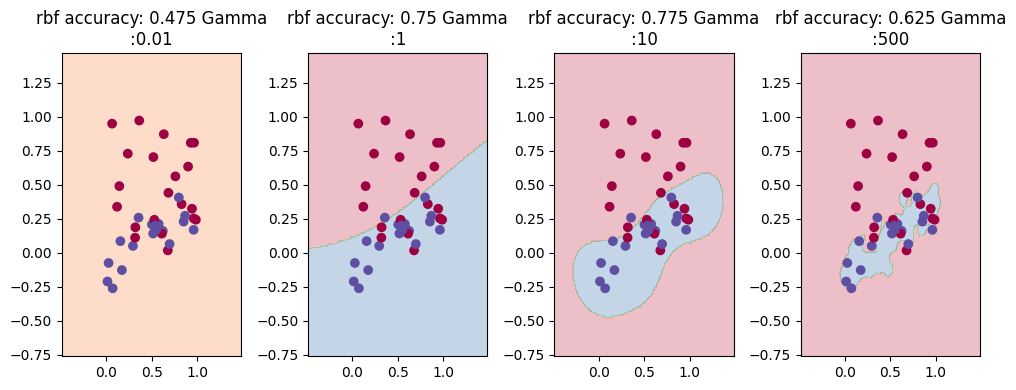

In [61]:
X, y = generate_linearly_separable_data(num_samples=100, seed=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

fig, axs = plt.subplots(1, 4, figsize=(10, 4))  # Adjust figsize as needed

for i,g in enumerate([0.01,1,10,500]):
    clf4 = svm.SVC(kernel= 'rbf',gamma=g)    
    clf4.fit( X_train , Y_train)
    predictions = clf4.predict( X_test )
    accuracy = accuracy_score(Y_test, predictions)
    plot_decision_boundary(axs[i], lambda X_test: clf4.predict(X_test), X_test, Y_test)
    axs[i].set_title('rbf accuracy: ' + str(accuracy) + ' Gamma\n:' +str(g))
plt.tight_layout()

plt.show() 
    


grid seach to find best options 

In [4]:
from sklearn.model_selection import GridSearchCV

X, y = generate_linearly_separable_data(num_samples=50, seed=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

def calculate_best_params(grid):
    clf  = svm.SVC()
    svm_cv = GridSearchCV(clf, grid, cv = 3)
    svm_cv.fit(X_train,Y_train)
    print("Best Parameters:",svm_cv.best_params_)
    print("Train Score:",svm_cv.best_score_)
    print("Test Score:",svm_cv.score(X_test,Y_test))
    
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf"],
    'degree' : [3,5,7],
    'gamma' : [0.01,1,10,500]
}

calculate_best_params(grid)